<a/ id='top'></a>
# Homework 4: Confidence intervals, hypothesis testing, and p-values
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday 5 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)  

---

In [2]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ (location) and $\beta=2$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces coral with gray edges.

In [2]:
colors1a = ['coral', 'gray']
def plot_gumble(mu=8, beta=2, n_sample=100):
    # code for x
    x = stats.gumbel_r.rvs(
        loc=mu,
        scale=beta,
        size=n_sample
    )
    # fig,ax
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    # plot the histogram
    pd.Series(x).hist(
        ax=ax, 
        color=colors1a[0], 
        edgecolor=colors1a[1], 
        bins=20, 
        density=True,
        label='Density'
    )
    ax.set_axisbelow(
        True
    )
    ax.set_xlabel(
        "Gumbel",
        fontsize=16
    )
    ax.set_ylabel(
        "Density",
        fontsize=16
    )
    ax.set_title(
        r"Gumbel($\beta=${}, $\mu=${})".format(beta, mu),
        fontsize=20
    )
    ax.legend()
    print(np.mean(x))

9.481113038232365


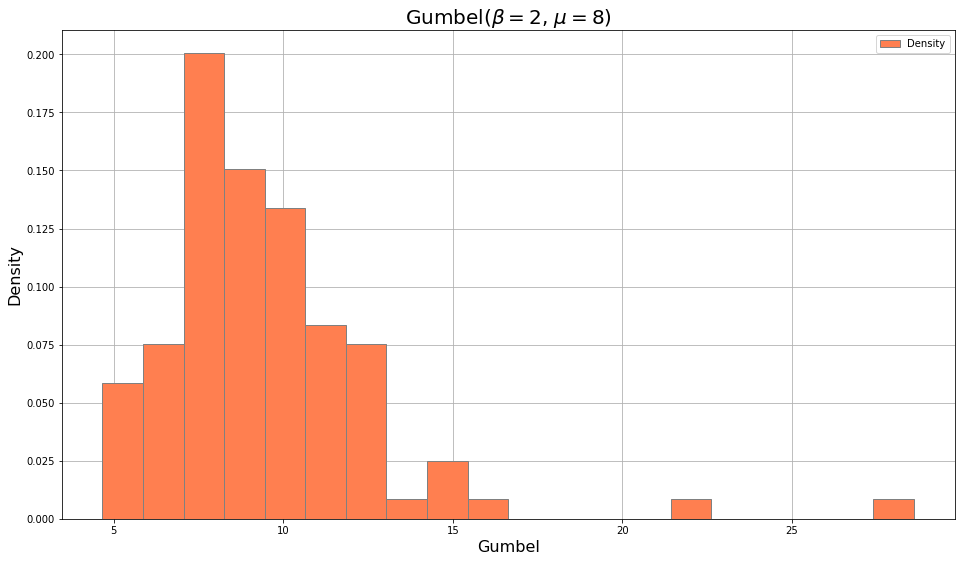

In [3]:
mu = 8
beta = 2
n_sample = 100
plot_gumble(mu, beta, n_sample)

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. Note that the version of the Gumbel we are using is *right-skewed*, and is the version used to model maximal extreme events.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

####  1.B.
$$
\text{Mean: }
\begin{align*}
\mu
    &= \alpha + \gamma \beta
    = 8 + \gamma 2
    = 9.1544
\end{align*}
$$
$$
\text{Variance: }
\begin{align*}
\sigma^{2}
    &= \frac{1}{6} \pi^{2} \beta^{2}
    = \frac{1}{6} \pi^{2} 2^{2}
    = \frac{2}{3} \pi^{2}
    = 6.5797
\end{align*}
$$

In [4]:
verbose = True
def mean_gumble(mu=8, beta=2, n_sample=100):
    # code for x
    x = stats.gumbel_r.rvs(
        loc=mu,
        scale=beta,
        size=n_sample
    )
    
    # get the constant
    g = np.euler_gamma
    if(verbose):
        print("euler_gamma: {}".format(g))
    
    # calculate the mean
    mean = mu + (g * beta)
    if(verbose):
        print("mean: {}".format(mean))
        
    # calculate variance
    var = (1/6)*(math.pi**2)*(beta**2)
    if(verbose):
        print("var: {}".format(var))
        
    return g, mean, var   

In [5]:
mean_gumble()

euler_gamma: 0.5772156649015329
mean: 9.154431329803066
var: 6.579736267392905


(0.5772156649015329, 9.154431329803066, 6.579736267392905)

Now that we have our values, we can compute the $95\%$ confidence interval. We want to find our $\alpha$ value. To do this we use the formula $1 - {CI} = 0.05$, or $5\%$. Since we are on both ends of the distribution, we divide $5\%$ by $2$ to give us $2.5\%$.

$$
\text{CI} = \bar{X} \pm z_{\left(0.025\right)} \times \sqrt{\frac{\sigma^{2}}{n}}
$$

In [6]:
stats.norm.ppf(1-0.025)

1.9599639845400538

Solving the equation above where:
$$
n = 100 \\
z_{\left(0.025\right)} = 1.96\\
\bar{X} = 9.1544\\
\sigma^{2} = 6.5797
$$
Gives us:
$$
\text{CI} =
    \left[
        \bar{X} - z_{\left(0.025\right)} \times \sqrt{\frac{\sigma^{2}}{n}} , 
        \bar{X} + z_{\left(0.025\right)} \times \sqrt{\frac{\sigma^{2}}{n}}
    \right]
    \\
\text{CI} =
    \left[
        9.1544 - 1.96 \times \sqrt{\frac{6.5797}{100}} ,
        9.1544 + 1.96 \times \sqrt{\frac{6.5797}{100}}
    \right]\\
\text{CI} =
    \left[
        8.7477,
        9.7532
    \right]
$$

In [7]:
def confIntv():
    g, mean, var = mean_gumble()
    mean = 9.250495117501464 # emperical mean from part A
    zalpha = stats.norm.ppf(1-0.025)
    n=100
    CIlower = mean - zalpha * (var/n)**(1/2)
    if(verbose):
        print("CIlower: {}".format(CIlower))
    CIupper = mean + zalpha * (var/n)**(1/2)
    if(verbose):
        print("CIupper: {}".format(CIupper))
    
    return CIlower, CIupper

In [8]:
confIntv()

euler_gamma: 0.5772156649015329
mean: 9.154431329803066
var: 6.579736267392905
CIlower: 8.74774482240242
CIupper: 9.753245412600506


(8.74774482240242, 9.753245412600506)

**Part C:  A theoretical interlude.** When Amy, the famous hedgehog data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

In [9]:
# GIVEN CODE:

def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    
    # Your code goes here!
    # various variables
    gamma = np.euler_gamma # gamma value
    conf = 0.66 # 66 percent
    num_rnd_CIs = 50
    
    if(verbose):
        print("gamma: {}".format(gamma))
    
    # calc truuuuu mean
    mean = calc_true_mean(mu, beta)
    if(verbose):
        print("mean: {}".format(mean))
    
    # calc var
    var = calc_var(beta)
    if(verbose):
        print("variance: {}".format(var))
    
    # calc std dev
    std_dev = calc_std_dev(beta, n)
    if(verbose):
        print("std dev {}".format(std_dev))    
    
    # calc z crit
    z_crit = calc_z_crit(conf)
    if(verbose):
        print("z crit: {}".format(z_crit))
    
    CI_arr = np.zeros((m, 2))
    """
    Lets never print this until we fill it up
    if(verbose):
        print("CI_arr: {}".format(CI_arr))
    """
    # ihatethisosmuchwhywhywhy
    CI_arr, cntr = calc_CIs(m, n, mu, beta, z_crit, std_dev, CI_arr, mean)
    if(verbose):
        print("CI_arr (only 5 elements): {}".format(CI_arr[:5]))
        print("Cntr: {}".format(cntr))
    
    print("Propro of CI: {}".format(cntr/m)) # 0.666 how lovely, exactly how i feel right now
    
    
    # plot function
    plot_CI_vals(m, num_rnd_CIs, CI_arr, mean)

In [10]:
# helper funcs

# calculate the true mean
def calc_true_mean(mu, beta):
    mean = mu + beta*np.euler_gamma
    return mean

# calculate the variance
def calc_var(beta):
    var = ((np.pi*beta)**2)/6
    return var

# calculate the standard deviation    
def calc_std_dev(beta, n):
    var = calc_var(beta)
    std_dev = (var/n)**(1/2)
    return std_dev

# calculate the z critical value
def calc_z_crit(conf):
    z_crit = stats.norm.ppf(1-(1-conf)/2)
    return z_crit

# note: this got way out of hand
# calculate the CIs
def calc_CIs(m, n, mu, beta, z_crit, std_dev, CI_arr, mean):
    cntr = 0 # counter
    # iterate through the samples
    for s in range(m):
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        x_bar = np.mean(x) # calculates our mean of the sample
        CIlower = x_bar - z_crit * std_dev # lower CI
        CIupper = x_bar + z_crit * std_dev # upper CI
        CI_arr[s, 0] = CIlower
        CI_arr[s, 1] = CIupper
        # is the mean within the upper bound
        if(mean <= CIupper):
            # is the mean within the lowr bound
            if(mean >= CIlower):
                # add 1 to the counter
                cntr = cntr + 1
    return CI_arr, cntr

# plot the CI values
def plot_CI_vals(m, num_rnd_CIs, CI_arr, mean):
    fig,ax=plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    for d,row in enumerate(np.random.choice(range(m), size=num_rnd_CIs, replace=False)):
        CIlower, CIupper = CI_arr[row,:] # goes through each row making the lower and upper CI val
        mycolor=colors1d[1] # by default, set it to coral
        # when they pass the bounds, color gets changed to steel blue
        if(mean <= CIupper):
            if(mean >= CIlower):
                mycolor=colors1d[0]
        plt.plot(
            [d+1, d+1],
            [CIupper, CIlower],
            color=mycolor
        )
    plt.plot(
        [0, num_rnd_CIs+1],
        [mean, mean],
        color=colors1d[2],
        ls='--'
    )
    ax.grid(
        alpha=0.25
    )
    ax.set_axisbelow(
        True
    )
    ax.set_xlabel(
        "Distribution of Confidence Intervals",
        fontsize=16
    )
    ax.set_ylabel(
        "Confidence Intervals",
        fontsize=16
    )
    ax.set_title(
        "Did the Confidence Interval Cover the Mean?",
        fontsize=20
    )

gamma: 0.5772156649015329
mean: 9.154431329803066
variance: 6.579736267392906
std dev 0.2565099660323728
z crit: 0.9541652531461947
CI_arr (only 5 elements): [[8.65359844 9.14310423]
 [8.70152521 9.191031  ]
 [8.9227565  9.4122623 ]
 [8.74927344 9.23877923]
 [8.91836492 9.40787072]]
Cntr: 328
Propro of CI: 0.656


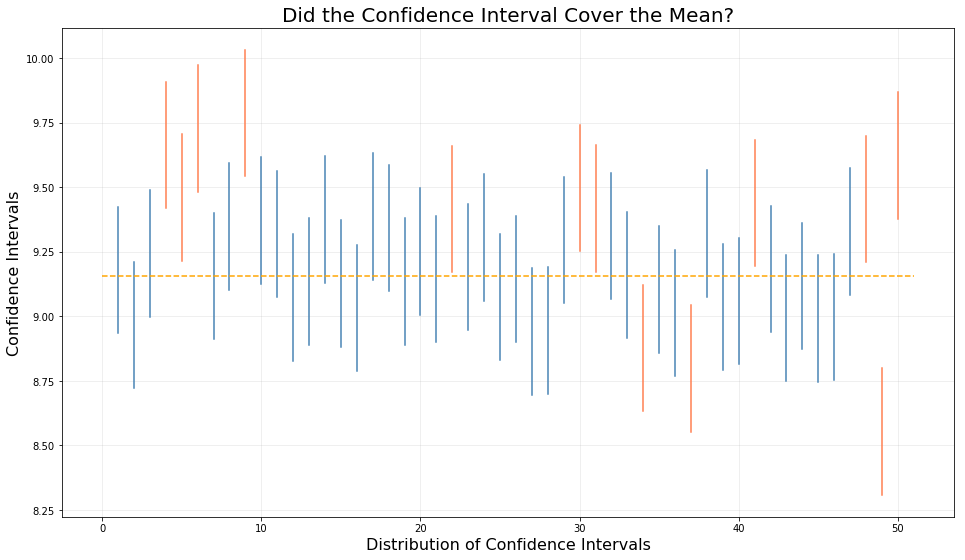

In [11]:
verbose=True
colors1d=['steelblue', 'coral', 'orange']
# steelblue for when they cover the mean
# coral for when they dont
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

It does. There are $17$ orange bars out of the $50$ total bars.

---

<a id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2 - Taco Town!!

You're an intern in the office of the City of Boulder's official Food Rater, and in order to support her in her extremely important job, you have to determine whether Taco Bell or Del Taco has the empirically better tacos. 

"Don't worry," you tell your boss. "I'll have you know I graduated top of my class from CU Boulder, and I've been involved in numerous data science operations on difficult data sets - many of which are hedgehog-related - and I have over 300 confirmed confidence intervals. I am trained in Numpy and Pandas and I'm the top data scientist in the entire campus."

"Weird flex but OK," your boss responds, and gives you the data. The data set consists of 100 diners who ate both Taco Bell and Del Taco, and rated their meal enjoyment at each. As is often the case with fast food taco establishments, each diner ate alone and each meal was followed by about 3 weeks of intense therapy, so the diners and meals may all be considered to be independent of one another. The meal enjoyment ratings are in units of *mehs*, where lower values denote more disgust and a worse meal, and higher values are better.

**Part A:** Import the data set `taco_time.csv` as a Pandas DataFrame.

Then, plot a density histogram of the data. Include both Taco Bell and Del Taco on the same set of axes. Be sure to label your axes, and make the histogram faces slightly transparent and include a legend, so we can tell the two data sets apart. Use colors for each restaurant that are representative of that restaurant's logo or branding.

Finally, formulate a hypothesis about which restaurant has the higher mean meal enjoyment.

In [6]:
verbose = False

colors_DT=['red', 'green', 'orange']
colors_TB=['navy', 'pink', 'gold']


taco_file_path = 'taco_time.csv'
tacoDF = pd.read_csv(taco_file_path)

del_taco = tacoDF['Del Taco']
if(verbose): print("del taco = {}".format(del_taco.head()))
del_taco.head()

taco_bell = tacoDF['Taco Bell']
if(verbose): print("taco bell = {}".format(taco_bell.head()))
taco_bell.head()

0   -1.423170
1   -3.170559
2    0.784251
3   -0.720648
4   -2.802470
Name: Taco Bell, dtype: float64

In [13]:
def graph_tacos():
    taco_bell.sort_values()
    del_taco.sort_values()
    # fig,ax
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    pd.Series(del_taco).hist(
        ax=ax, 
        color=colors_DT[0], 
        edgecolor=colors_DT[1], 
        bins=20, 
        density=True,
        alpha=0.5,
        label='Del Taco'
    )
    pd.Series(taco_bell).hist(
        ax=ax, 
        color=colors_TB[0], 
        edgecolor=colors_TB[1], 
        bins=20, 
        density=True,
        alpha=0.5,
        label='Taco Bell'
    )
    ax.grid(
        alpha=0.25,
        color=colors_TB[2]
    )
    ax.set_axisbelow(
        True
    )
    ax.set_xlabel(
        "Rating of Taco Bell vs Del Taco (mehs)",
        fontsize=16,
        color=colors_DT[2]
    )
    ax.set_ylabel(
        "Density",
        fontsize=16,
        color=colors_DT[2]
    )
    ax.set_title(
        "Density of the Rating of Taco Bell vs Del Taco (mehs)",
        fontsize=20,
        color=colors_DT[2]
    )
    ax.legend()

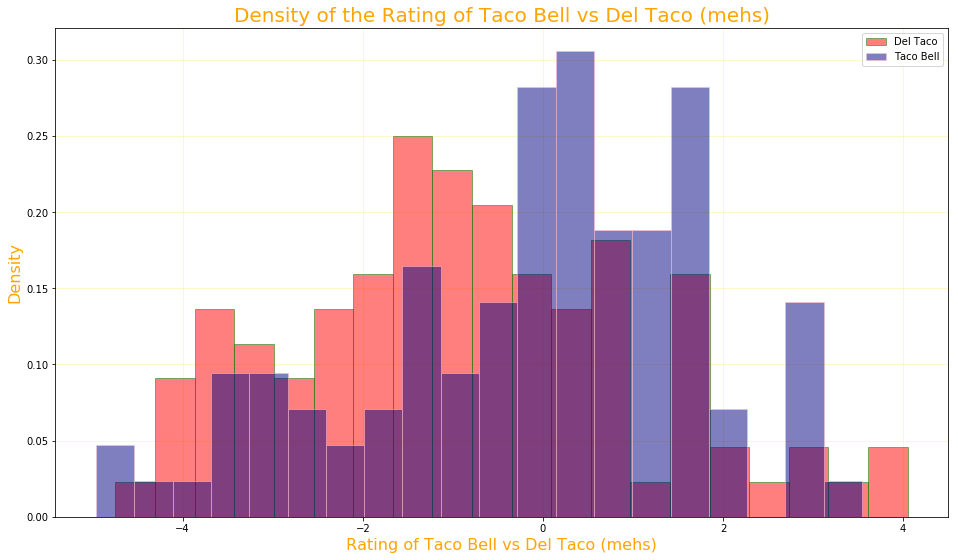

In [14]:
graph_tacos()

### 2.A Words)
I would say based on the graph that taco bell has more enjoyment than del taco. It seems to be skewed more to the left a bit more whereas del taco seems to be mostly below zero. Both restaurants, however, seem very MEH. Taco Bell seems slightly better meh.

**Part B:** Compute a 95% confidence interval for the mean enjoyment of Taco Bell meals, and a separate 95% confidence interval for the mean enjoyment of Del Taco meals. You can use Python as a calculator, but the set-up and groundwork for your computation should be in Markdown/MathJax.

Based on those confidence intervals, can we conclude that the means are different at the 95% level of confidence?

### 2.B Solution)

Forumla for a confidence interval:
$$
CI = \bar{X} \pm Z_{\frac{\alpha}{2}} * \frac{\sigma}{\sqrt{n}}
$$
Since we are computing a $95\%$ confidence interval, $\alpha = 0.05$.
I made some functions below (that I will use for the confidence interval python calculation).

In [19]:
def get_all_values():
    tacobell_CI()
    deltaco_CI()

verbose=True
get_all_values()

Taco Bell mean: -0.11369182761473999
Taco Bell Std Dev: 1.8825017217657931
Taco Bell Sample Size: 100
Z Crit: 1.9599639845400538
Tacobell Lower CI: -0.48265538516429957
Tacobell Upper CI: 0.25527172993481956
Del Taco mean: -0.8343471961220463
Del Taco Std Dev: 1.9096501965979529
Del Taco Sample Size: 100
Z Crit: 1.9599639845400538
Del Taco Lower CI: -1.2086317569622285
Del Taco Upper CI: -0.46006263528186425


Continuing on to our formula, For $\mu$ of Taco Bell:
$$
\begin{align*}
CI
    &= \bar{X}_{tacobell} \pm Z_{\frac{\alpha}{2}} * \frac{\sigma_{tacobell}}{\sqrt{n_{tacobell}}}\\
    &= {-0.11369} \pm 1.96 * \frac{1.8825}{\sqrt{100}} \\
    &= \left[ {-0.4827}, {0.2553} \right]
\end{align*}
$$

For $\mu$ of Del Taco:
$$
\begin{align*}
CI
    &= \bar{X}_{deltaco} \pm Z_{\frac{\alpha}{2}} * \frac{\sigma_{deltaco}}{\sqrt{n_{deltaco}}}\\
    &= {-0.8343} \pm 1.96 * \frac{1.9097}{\sqrt{100}} \\
    &= \left[ {-1.2086}, {0.4601} \right]
\end{align*}
$$

Therefore, since the confidence intervals fall within each other, we can not say with a $95\%$ level of confidence that the means are different.

In [17]:
# confidence interval for taco bell
def tacobell_CI():
    tacobell_xbar = get_tacobell_mean()
    tacobell_stddev = get_tacobell_stddev()
    tacobell_n = get_tacobell_ct()
    z_crit = get_zcrit1()
    CIlower = tacobell_xbar - z_crit * tacobell_stddev/(tacobell_n )**(1/2)
    if(verbose):
        print("Tacobell Lower CI: {}".format(CIlower))
    CIupper = tacobell_xbar + z_crit * tacobell_stddev/(tacobell_n )**(1/2)
    if(verbose):
        print("Tacobell Upper CI: {}".format(CIupper))    
    return CIlower, CIupper

# confidence interval for del taco
def deltaco_CI():
    deltaco_xbar = get_deltaco_mean()
    deltaco_stddev = get_deltaco_stddev()
    deltaco_n = get_deltaco_ct()
    z_crit = get_zcrit1()
    CIlower = deltaco_xbar - z_crit * deltaco_stddev/(deltaco_n)**(1/2)
    if(verbose):
        print("Del Taco Lower CI: {}".format(CIlower))
    CIupper = deltaco_xbar + z_crit * deltaco_stddev/(deltaco_n)**(1/2)
    if(verbose):
        print("Del Taco Upper CI: {}".format(CIupper))
    return CIlower, CIupper

In [18]:
# taco bell mean
def get_tacobell_mean():
    tacobell_mean = taco_bell.mean()
    if(verbose):
        print("Taco Bell mean: {}".format(tacobell_mean))
    return tacobell_mean

# tacobell std dev
def get_tacobell_stddev():
    tacobell_stddev = (taco_bell.var(ddof=1))**(1/2)
    if(verbose):
        print("Taco Bell Std Dev: {}".format(tacobell_stddev))
    return tacobell_stddev

# taco bell sample size
def get_tacobell_ct():
    tacobell_n = taco_bell.count()
    if(verbose):
        print("Taco Bell Sample Size: {}".format(tacobell_n))
    return tacobell_n

# del taco mean
def get_deltaco_mean():
    deltaco_mean = del_taco.mean()
    if(verbose):
        print("Del Taco mean: {}".format(deltaco_mean))
    return deltaco_mean

# del taco std dev
def get_deltaco_stddev():
    deltaco_stddev = (del_taco.var(ddof=1))**(1/2)
    if(verbose):
        print("Del Taco Std Dev: {}".format(deltaco_stddev))
    return deltaco_stddev

# del taco sample size
def get_deltaco_ct():
    deltaco_n = del_taco.count()
    if(verbose):
        print("Del Taco Sample Size: {}".format(deltaco_n))
    return deltaco_n


def get_zcrit1():
    z_crit = stats.norm.ppf(1-(1-0.95)/2)
    if(verbose):
        print("Z Crit: {}".format(z_crit))
    return z_crit

**Part C:** Compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. 

The formula will be similar to the one above but slightly different.

$$
\begin{align*}
CI
    &= \bar{X}_{tacobell} - \bar{X}_{deltaco} \pm Z_{\frac{\alpha}{2}} \times \left( \frac{\sigma_{tacobell}}{\sqrt{n_{tacobell}}} + \frac{\sigma_{deltaco}}{\sqrt{n_{deltaco}}} \right) \\
    &= {-0.11369} - {-0.8343} \pm 1.96 * \frac{1.8825}{\sqrt{100}} + \frac{1.9097}{\sqrt{100}} \\
    &= \left[ {-0.0226}, {1.4639} \right]
\end{align*}
$$


In [ ]:
# final calculation
def del_taco_bell_CI():
    tacobell_xbar = get_tacobell_mean()
    tacobell_stddev = get_tacobell_stddev()
    tacobell_n = get_tacobell_ct()
    deltaco_xbar = get_deltaco_mean()
    deltaco_stddev = get_deltaco_stddev()
    deltaco_n = get_deltaco_ct()
    z_crit = get_zcrit1()
    CIlower = (tacobell_xbar - deltaco_xbar) - z_crit * ((tacobell_stddev/(tacobell_n )**(1/2)) + (deltaco_stddev/(deltaco_n )**(1/2)))
    if(verbose):
        print("Del Taco Bell Lower CI: {}".format(CIlower))
    CIupper = (tacobell_xbar - deltaco_xbar) + z_crit * ((tacobell_stddev/(tacobell_n )**(1/2)) + (deltaco_stddev/(deltaco_n )**(1/2)))
    if(verbose):
        print("Del Taco Bell Upper CI: {}".format(CIupper))    
    return CIlower, CIupper

In [ ]:
verbose=False
del_taco_bell_CI()

**Part D:** Comment on how the results from this two-sample confidence interval compare to the results from the separate one-sample confidence intervals. In 1-2 sentences, discuss how these results confirm, disprove, or otherwise relate to your hypothesis from Part A.

$$
\begin{align*}
\text{Taco Bell CI: } &= \left[ {-0.4827}, {0.2553} \right]\\
\text{Del Taco CI: } &= \left[ {-1.2086}, {0.4601} \right]\\
\text{Difference: } &= \left[ {-0.0226}, {1.4639} \right]\\
\end{align*}
$$

The mean of Del Taco is lower than that of Taco Bell, however with a $95\%$ confidence interval, the results disprove my original hypothesis of Taco Bell being better than Del Taco. It seems that the confidence interval of Del Taco is actually (slightly) higher than that of Taco Bell's. So I can reject the null hypothesis that Taco Bell is better than Del Taco.

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas DataFrame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly, based on what represents a separation between two columns of data.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [ ]:
dfMPG = pd.read_csv(
    'auto-mpg.data',
    header=None, # we dont want to use a header
    sep='\s+'
) # TODO - need extra arguments to read correctly

# More processing code should go here!

#dfMPG.head()

dfMPG.columns=[
    "mpg", # miles per gallon
    "cyls", # cyls
    "displ", # displacement
    "hp", # horsepower
    "wt", # weight
    "accel", # acceleration
    "my", # model year
    "orig", # origin
    "carname"
]

#dfMPG.head()

dfMPG = dfMPG.replace({"?":np.nan}) # replace the ? with nan

#dfMPG.head()

dfMPG.dropna() # drop the ones with nan

dfMPG.head()

**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 90% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

Will format code similar as above problem.

In [ ]:
def calc_mpg_CI():
    mpg_mean = get_mpg_mean()
    mpg_stddev = get_mpg_stddev()
    mpg_ct = get_mpg_ct()
    zcrit = get_zcrit2()
    CIlower = mpg_mean - zcrit * (mpg_stddev / (mpg_ct)**(1/2))
    if(verbose):
        print("mpg lower CI: {}".format(CIlower))
    CIupper = mpg_mean + zcrit * (mpg_stddev / (mpg_ct)**(1/2))
    if(verbose):
        print("mpg upper CI: {}".format(CIupper))
    return CIlower, CIupper

In [ ]:
def get_mpg_mean():
    mpg_mean = dfMPG["mpg"].mean()
    if(verbose):
        print("mpg mean: {}".format(mpg_mean))
    return mpg_mean

def get_mpg_stddev():
    mpg_stddev = dfMPG["mpg"].std(ddof=1)
    if(verbose):
        print("mpg std dev: {}".format(mpg_stddev))
    return mpg_stddev

def get_mpg_ct():
    mpg_ct = len(dfMPG)
    if(verbose):
        print("mpg ct: {}".format(mpg_ct))
    return mpg_ct

def get_zcrit2():
    zcrit = stats.norm.ppf(1-(1 - 0.90)/2)
    if(verbose):
        print("z crit: {}".format(zcrit))
    return zcrit

In [ ]:
verbose=True
calc_mpg_CI()

### 3.B Confidence)
The confidence interval for the MPG:
$$
\left[ 22.870, 24.159 \right]
$$

Therefore, we can say with a $90\%$ level of confidence that the gas milage is greater than $20$ mpg. This confirms our null hypothesis that $\text{mpg} >= 20$

**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Using an appropriate *hypothesis test*, can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

### 3.C Math)

Establishing some variables first:

$$
\begin{align*}
\mu_{4/6 \text{cyls}} &: \text{true mean for engines with 4 or 6 cylinders}\\
\bar{X}_{4/6 \text{cyls}} &: \text{Sample mean for the 4 or 6 cylinder engines}\\
{s}_{4/6 \text{cyls}} &: \text{std dev for the 4 or 6 cylinder engines}\\
{n}_{4/6 \text{cyls}} &: \text{number of 4 or 6 cylinder engines}\\
\mu_{8 \text{cyls}} &: \text{true mean for engines with 8 cylinders}\\
\bar{X}_{8 \text{cyls}} &: \text{Sample mean for the 8 cylinder engines}\\
{s}_{8 \text{cyls}} &: \text{std dev for the 8 cylinder engines}\\
{n}_{8 \text{cyls}} &: \text{number of 8 cylinder engines}\\
\end{align*}
$$

The variables look hideous. Anyways lets put them into a formula.

$$
\begin{align*}
Z
    &= \frac{\bar{X}_{4/6 \text{cyls}} - \bar{X}_{8 \text{cyls}} - 10}{\sqrt{\frac{{{s}_{4/6 \text{cyls}}}^{2}}{{n}_{4/6 \text{cyls}}}} + \sqrt{\frac{{{s}_{8 \text{cyls}}}^{2}}{{n}_{8 \text{cyls}}}}}
    = 2.3263
\end{align*}
$$

The formula looks even more hideous. If there was a way to make them look neater I would appricate the tip.

In [ ]:
def calc_648_CI():
    mean4or6 = get_4or6_mean()
    var4or6 = get_4or6_var()
    ct4or6 = get_4or6_count()
    mean8 = get_8_mean()
    var8 = get_8_var()
    ct8 = get_8_count()
    
    alpha=0.01
    zcrit = get_zcrit3(alpha)
    mpg10=10
    
    testst = (mean4or6-mean8-mpg10)/((var4or6/ct4or6 + var8/ct8)**(1/2))
    if(verbose):
        print("Test Statistic, Z: {}".format(testst))
    
    # running the p-test
    pval = 1 - stats.norm.cdf(testst)
    if(verbose):
        print("p-value: {}".format(pval))
        
    if(pval < alpha):
        print("We reject the null hypothesis: p value {} is less than alpha {}".format(pval, alpha))
    else:
        print("We accept the null hypothesis: p value {} is greater than alpha {}".format(pval, alpha))
        
    if(zcrit < testst):
        print("We reject the null hypothesis: Z Critical {} is less than Test Statistic {}".format(zcrit, testst))
    else:
        print("We accept the null hypothesis: Z Critical {} is greater than Test Statistic {}".format(zcrit, testst))

In [ ]:
# 4 or 6 cyls mean
def get_4or6_mean():
    mean = dfMPG.loc[
        (dfMPG.cyls == 4) | (dfMPG.cyls == 6), 
        "mpg"
    ].mean()
    if(verbose):
        print("4 or 6 mean: {}".format(mean))
    return mean

# 4 or 6 cyls var
def get_4or6_var():
    var = dfMPG.loc[(dfMPG.cyls == 4) | (dfMPG.cyls == 6), "mpg"].var()
    if(verbose):
        print("4 or 6 var: {}".format(var))
    return var

# 4 or 6 cyls count
def get_4or6_count():
    sampnum = np.sum(dfMPG.cyls == 4) + np.sum(dfMPG.cyls == 6)
    if(verbose):
        print("4 or 6 samp num: {}".format(sampnum))
    return sampnum    

# 8 cyls mean
def get_8_mean():
    mean_8 = dfMPG.loc[(dfMPG.cyls == 8), "mpg"].mean()
    if(verbose):
        print("mean_8: {}".format(mean_8))
    return mean_8

# 4 or 6 cyls var
def get_8_var():
    var = dfMPG.loc[(dfMPG.cyls == 8), "mpg"].var()
    if(verbose):
        print("8 var: {}".format(var))
    return var

# 4 or 6 cyls count
def get_8_count():
    sampnum = np.sum(dfMPG.cyls == 8)
    if(verbose):
        print("8 samp num: {}".format(sampnum))
    return sampnum

# z crit
def get_zcrit3(alpha):
    zcrit = stats.norm.ppf(1 - alpha)
    if(verbose):
        print("zcrit: {}".format(zcrit))
    return zcrit

In [ ]:
calc_648_CI()

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Grab bag!



<img src="http://blog.localditch.com/wp-content/uploads/2011/01/sonic4.jpg" style="width: 400px;"/>

**Part A**: You work for an engineering firm that has been hired to construct a corkscrew-shaped looped path for hedgehogs to run on and collect gold rings. Thousands of hedgehogs will run along this path each day, so structural failure means injury or death for many wonderful little creatures. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the corkscrew path. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

### 4.A Things)

The null hypothesis is when the strength of the carbon fiber is above the tolerance rating.

- Type I error (false positive): The carbon fiber is not safe enough but it is accepted - hedgehogs die.
- Type II error (false negative): The carbon fiber is safe but it is rejected - no hedgehogs die.

I would rather get a Type II error so no hedgehogs die.

**Part B**: Amy, the famous hedgehog data scientist, is working for the same engineering firm as you. She is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Amy has constructed, 931 of them have turned out to actually capture the true population mean. Since Amy is a data science wizard and you can be sure she is constructing her confidence intervals correctly and collecting and using her data honestly, about how many 95% confidence intervals would you expect her to have constructed total? Explain your reasoning fully with words as well as some math.

### 4.B Totals)
Since Amy has hit $931$ true population means with a $95\%$ confidence interval, this is representative of $95\%$ of the total test she has conducted.
$$
\text{total}= \frac{931}{0.95} = 980
$$

In [ ]:
# QUICK MATHS
931/0.95

**Part C**: As part of an outreach program, you and Amy are visiting a local elementary school to talk to the students about data science. What a riot! One of the more astute students asks you a question: "In general, which is wider: a 95% confidence interval or a 99% confidence interval?"

How would you explain this to these young students, who are not fluent in any kind of science? (So, for example, spouting off theory and words like "mean" and "z critical value" probably won't mean anything to them.)

### 4.C for Chocolate)

"
Alright kids listen up.
Suppose I emptied this party bag of $1000$ pieces of Hershey's fun-sized chocolates on this table (note: i would be prepared and bring a huge bag of chocolate to demonstrate this as I am saying it for dramatic effect).
Some of these chocolates are dark chocolates, some have almonds, some are regular milk, and so forth.
How do we know what the bag has most of?
How do we know what the bag has least of?
We can count them all up, but who has time for that?
We can take handfulls of the chocolates and this is called a sample.
If I were to take a handfull of a chocolates on the table, how much of my favorite (dark chocolate) would I get?
If a student with a smaller hand were to do it, how much would they get?
If we used a shovel, how much would we get?

Lets lay out some obvious observations:
1. I can get zero of my favorite (unlikely)
2. I can get all of my favorite (unlikely).
3. We do not know how much more or less the milk chocolate or almond make up the bag (they can be more or less).

I grab a handful from the pile and I get $5$ dark chocolates.

We can come to the conclusion:
- I am $95\%$ confident that I will get $4$ or $4$ dark chocolates.
- I am $99\%$ confident that I will get $3$ or $6$ dark chocolates.

Having a higher confidence interval will yeild a wider range of outcomes of your favorite chocolate.
"

**Part D:** You observe a sample of 73 pygmy hedgehogs and find that 49 of them are fantastic pets. Then, you observe a sample of 58 long-eared hedgehogs and find that 51 of them are fantastic pets.

Is there statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets? Perform a test that computes and properly interprets a p-value.

In [ ]:
49/73

In [ ]:
51/58

haha yes.

**Part E**: Let $X$ be a normally-distributed random variable representing the difficulty of a homework problem in CSCI 3022. You draw from it more times than you care to count during the Spring 2019 semester and get the following values, stored in the numpy array **toughness**, below. Compute a 90% confidence interval for the _standard deviation_ in problem toughness.

In [ ]:
toughness = np.array([7.7778,6.9459,5.8248,9.1111,6.0180,5.0898,7.0380,8.9273,2.9614,5.8387,6.0231])

In [ ]:
# formula for ch^2 distribution:  X^2 = (n-1)s^2 / sigma^2
# X^2_{1-a/2} <= (n-1)s^2 / sigma^2 <= X^2_{a/2}
# << (n-1)s^2 / X^2_{1-a/2} <= sigma^2 <= (n-1)s^2 / X^2_{a/2} >>
# [(n-1)s^2 / X^2_{1-a/2}, (n-1)s^2 / X^2_{a/2}]

def calc_tough_CI():
    ci=0.90
    a=1-ci
    al= a/2
    ar=1-al
    # ar, al
    tough_stddev = get_tough_stddev() # s
    tough_var = get_tough_var() # s^2
    tough_ct = get_tough_ct() # n value
    
    Xl=get_chi_stat(al, tough_ct)
    Xr=get_chi_stat(ar, tough_ct)
    
    CIlower = compute_intvl(tough_ct, tough_var, Xr)
    CIlower = (CIlower)**(1/2)
    CIupper = compute_intvl(tough_ct, tough_var, Xl)
    CIupper = CIupper**(1/2)
    
    if(verbose):
        print("{:0.04f} <= {:0.04f} <= {:0.04f}".format(CIlower, tough_stddev, CIupper))
    
    return CIlower, CIupper


def compute_intvl(n, s2, chi):
    intvl = ((n-1) * s2)/chi
    return intvl

def get_tough_mean():
    tough_mean = toughness.mean()
    if(verbose):
        print("tough mean: {}".format(tough_mean))
    return tough_mean

def get_tough_var():
    tough_stddev = toughness.var(ddof=1)
    if(verbose):
        print("tough var: {}".format(tough_stddev))
    return tough_stddev

def get_tough_stddev():
    tough_stddev = toughness.std(ddof=1)
    if(verbose):
        print("tough std dev: {}".format(tough_stddev))
    return tough_stddev

def get_tough_ct():
    tough_ct = len(toughness)
    if(verbose):
        print("tough ct: {}".format(tough_ct))
    return tough_ct

def get_chi_stat(a, ct):
    Xstat = stats.chi2.ppf(q=a, df=ct-1)
    if(verbose):
        print("X stat: {}".format(Xstat))
    return Xstat

In [ ]:
verbose=True
calc_tough_CI()

---

<a id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Key West, Florida. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_keywest.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [9]:
from cycler import cycler

dfSK = pd.read_csv(
    'sealevel_keywest.csv',
    header=None
)

dfSK.columns=[
    "year", # year
    "month", # month
    "day", # day of month
    "sea level (mm)", # measured sea level in mm
]

dfSK.loc[:6]

,year,month,day,sea level (mm)
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474
5,1913,1,25,1442
6,1913,1,26,1467


In [ ]:
colors5=[
    'coral',
    'seagreen',
    'turquoise',
    'aqua'
]

**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

In [ ]:
def graph_sealevels():
    xmarks = dfSK.index[(dfSK["year"]%10==0) & (dfSK["month"]==1) & (dfSK["day"]==2)]
    
    fig, ax = plt.subplots(
        figsize=(16,9)
    )
    
    ax.set_xticks(xmarks)
    
    ax.set_xticklabels(
        dfSK.loc[xmarks, "year"]
    )
    
    dfSK["sea level (mm)"].plot(
        linestyle="solid",
        linewidth=0.5,
        color=colors5[0]
    )
    
    ax.set_ylabel(
        "Measured Sea Level (mm)",
        fontsize=16
    )
    
    ax.set_xlabel(
        "Year",
        fontsize=16
    )
    
    ax.set_title(
        "Sea Level Over Time",
        fontsize=20
    )

In [ ]:
graph_sealevels()

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

In [ ]:
def graph_clean_sealevels():
    
    dfNewSK = get_clean_dfSK() # function that returned the clean data
    
    # TODO: Include stars from second day of each month
    xmarks = dfNewSK.index[
        (dfNewSK["year"]%10==0) & (dfNewSK["month"]==1) & (dfNewSK["day"]==2) # year/10, january, 2
    ]
    
    fig, ax = plt.subplots(
        figsize=(16,9)
    )
    
    dfNewSK["sea level (ft)"].plot(
        linestyle='solid',
        #linewidth=2,
        color=colors5[1]
    )
    
    ax.set_xticks(xmarks)
    
    ax.set_xticklabels(
        dfNewSK.loc[xmarks, "year"]
    )
    
    ax.set_ylabel(
        "Measured Sea Level (ft)",
        fontsize=16
    )
    
    ax.set_xlabel(
        "Year",
        fontsize=16
    )
    
    ax.set_title(
        "Sea Level Over Time",
        fontsize=20
    )
    
    plt.show()
    

In [ ]:
# need to make a function that returns the clean data for next step

def get_clean_dfSK():
    # copy to new so its easier to work with
    
    
    # TODO: Convert mm to Feet
    dfNewSK["sea level (mm)"] = dfNewSK["sea level (mm)"] * 0.00328084 # convert it to feet
    dfNewSK.columns=[
        "year", # year
        "month", # month
        "day", # day of month
        "sea level (ft)", # measured sea level in ft
    ]
    
    # TODO: Remove data points associated with spikes
    # identify what we want to remove
    dfNewSK_remove = dfNewSK.loc[
        dfNewSK["sea level (ft)"] < -20,
        "sea level (ft)"
    ].median()
    # replace with nan
    dfNewSK.loc[
        dfNewSK["sea level (ft)"]==dfNewSK_remove, # if it is eq to our remove value
        "sea level (ft)"
    ] = np.nan
    # get rid of all nan values
    dfNewSK.dropna(
        subset=["sea level (ft)"],
        inplace=True
    )
    
    # TODO: only get the second day of each month
    day2 = dfNewSK.index[dfNewSK['day']==2] # second days
    dfNewSK = dfNewSK.loc[day2, :] # only keep the second days
    
    return dfNewSK

In [ ]:
"""
dfTest = get_clean_dfSK() # new df to test
dfTest.head() # do we get what we want???
"""
graph_clean_sealevels()

**Part D:** Your mysterious employer owns a lot of beachfront property in Key West and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Key West in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try.

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 

In [ ]:
def difference_in_sea_levels():
    # confusion?? 2010 - 2000 = 10 year so why does it say a lot of 11 yeear periods to try????????
    decade=10
    a = 0.99
    
    # looking at the data, it seems that it starts in 1913. I figured it best to start at next full decade
    decade1_start = 1920 # next starting decade
    decade1_end = decade1_start + decade
    
    # modern times
    decade2_start=2000
    decade2_end=decade2_start + decade
    
    # getting crazy and trying all of the decades now
    decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
    
    for t in range(len(decades) - 1):
        D_start = decades[t]
        D_end = decades[t+1]
        D_CIlower, D_CIupper = calc_sl_CI(D_start, D_end, a)
        print("{}-{} CI: [{:0.04f}, {:0.04f}]".format(D_start, D_end, D_CIlower, D_CIupper))
    
    
    D1_CIlower, D1_CIupper = calc_sl_CI(decade1_start, decade1_end, a)
    D2_CIlower, D2_CIupper = calc_sl_CI(decade2_start, decade2_end, a)
    
    print("What the question actually asked for...")
    # upset that I just NOW learned i can have the decimals go to a spot ...
    print("1920-1930 CI: [{:0.04f}, {:0.04f}]".format(D1_CIlower, D1_CIupper))
    print("2000-2010 CI: [{:0.04f}, {:0.04f}]".format(D2_CIlower, D2_CIupper))
    
    return (D1_CIlower, D1_CIupper) , (D2_CIlower, D2_CIupper)

In [ ]:
def calc_sl_CI(dstart, dend, a):
    sl_mean, sl_stddev, sl_ct = new_df_5D(dstart, dend)
    zcrit = get_zcrit5(a)
    
    CIlower = sl_mean - zcrit * (sl_stddev / (sl_ct)**(1/2))
    if(verbose):
        print("sl lower CI: {}".format(CIlower))
    CIupper = sl_mean + zcrit * (sl_stddev / (sl_ct)**(1/2))
    if(verbose):
        print("sl upper CI: {}".format(CIupper))
    return CIlower, CIupper

In [ ]:
def new_df_5D(dstart, dend):
    dfSK_D = get_clean_dfSK()
    dfSK_D = dfSK_D.loc[
        (dfSK_D['year'] >= dstart) & (dfSK_D['year'] <= dend), "sea level (ft)"
    ]
    
    # get_sl_mean()
    sl_mean = dfSK_D.mean()
    if(verbose):
        print("sea level (ft) mean: {}".format(sl_mean))
        
    # def get_sl_stddev()
    sl_stddev = dfSK_D.std(ddof=1)
    if(verbose):
        print("sea level (ft) std dev: {}".format(sl_stddev))
        
    # def get_sl_ct():
    sl_ct = len(dfSK_D)
    if(verbose):
        print("sl ct: {}".format(sl_ct))
        
    return sl_mean, sl_stddev, sl_ct

def get_zcrit5(a):
    alpha=1-a
    zcrit = stats.norm.ppf(1-(alpha)/2)
    if(verbose):
        print("z crit: {}".format(zcrit))
    return zcrit

In [ ]:
verbose=False
# t1, t1m, t1s, t1c = new_df_5D(1920, 1930)
# t1.head()
difference_in_sea_levels()

### 5.D Final words)
We can say with a $99\%$ confidence level that the water level has risen from the roaring twenties to modern day times. And that we can REJECT the null hypothesis that the water levels have not been increasing.
